In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install emoji
!pip3 install nltk
!pip install swifter
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=8b528d5d27e20d3ddb90541f833d43bf885b8721728d831bff12f904e417cc3d
  Stored in directory: /root/.cache/pip/wheels/ef/7f/bd/9bed48f078f3ee1fa75e0b29b6e0335ce1cb03a38d3443b3a3
Successfully built swifter
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
import emoji
import nltk

from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


In [7]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
df = pd.read_csv("Dataset Cyberbullying.csv")
df

,id,teks,label
0,1,"Kaka tidur yaa, udah pagi, gaboleh capek2",no
1,2,makan nasi padang aja begini badannya,no
2,3,yang aku suka dari dia adalah selalu cukur jem...,yes
3,4,Hai kak Isyana aku ngefans banget sama kak Isy...,no
4,5,Manusia apa bidadari sih herann deh cantik ter...,no
...,...,...,...
1045,1046,Bangga sama suami yg selalu ingat istri disela...,no
1046,1047,Apaoun pekerjaannya yg penting halal u tuk men...,no
1047,1048,Gojek itu mayoritas pegangguran yang lama gak ...,no
1048,1049,<USERNAME> aslinya cantik dan ayu loh mbak krn...,no


# Class Distribution

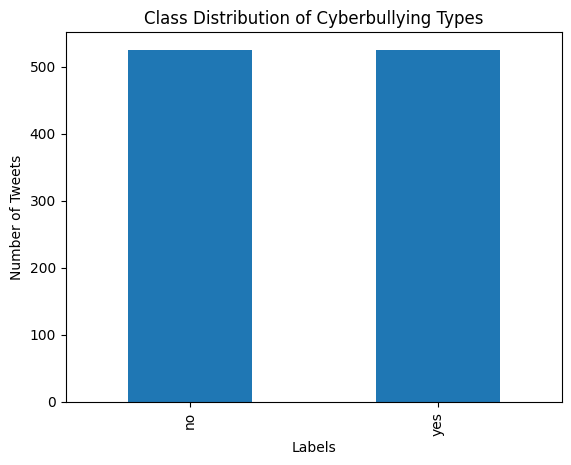

,count
label,
no,525
yes,525


In [11]:
# Create a bar plot of the class distribution
class_counts = df['label'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Cyberbullying Types')
plt.xlabel('Labels')
plt.ylabel('Number of Tweets')
plt.show()
df.label.value_counts()

# Preprocessing

## 1. Data Cleaning

In [ ]:
df

,id,teks,label
0,1,"Kaka tidur yaa, udah pagi, gaboleh capek2",no
1,2,makan nasi padang aja begini badannya,no
2,3,yang aku suka dari dia adalah selalu cukur jem...,yes
3,4,Hai kak Isyana aku ngefans banget sama kak Isy...,no
4,5,Manusia apa bidadari sih herann deh cantik ter...,no
...,...,...,...
1045,1046,Bangga sama suami yg selalu ingat istri disela...,no
1046,1047,Apaoun pekerjaannya yg penting halal u tuk men...,no
1047,1048,Gojek itu mayoritas pegangguran yang lama gak ...,no
1048,1049,<USERNAME> aslinya cantik dan ayu loh mbak krn...,no


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
def clean_text(text):
    text = re.sub(r'\$\w*', '', text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', text)
    text = re.sub('&quot;'," ", text)
    text = re.sub(r"\d+", " ", str(text))
    text = re.sub(r"\b[a-zA-Z]\b", "", str(text))
    text = re.sub(r"[^\w\s]", " ", str(text))
    text = re.sub(r'(.)\1+', r'\1\1', text)
    text = re.sub(r"\s+", " ", str(text))
    text = re.sub(r'#', '', text)
    text = re.sub(r'[^a-zA-z0-9]', ' ', str(text))
    text = re.sub(r'\b\w{1,2}\b', '', text)
    text = re.sub(r'\s\s+', ' ', text)
    text = re.sub(r'^RT[\s]+', '', text)
    text = re.sub(r'^b[\s]+', '', text)
    text = re.sub(r'^link[\s]+', '', text)
    return text

def remove_emoji(text):
    emoji = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # simbol & piktogram
                        u"\U0001F680-\U0001F6FF"  # transportasi & simbol peralatan
                        u"\U0001F1E0-\U0001F1FF"  # bendera negara
                        u"\U00002702-\U000027B0"  # simbol
                        u"\U000024C2-\U0001F251"  # emoji lainnya
                        "]+", flags=re.UNICODE)
    return emoji.sub(r'', text)

In [ ]:
df['clean_text'] = df['teks'].apply(clean_text)
df['clean_text'] = df['clean_text'].apply(remove_emoji)
df.head(6)

,id,teks,label,clean_text
0,1,"Kaka tidur yaa, udah pagi, gaboleh capek2",no,Kaka tidur yaa udah pagi gaboleh capek
1,2,makan nasi padang aja begini badannya,no,makan nasi padang aja begini badannya
2,3,yang aku suka dari dia adalah selalu cukur jem...,yes,yang aku suka dari dia adalah selalu cukur jem...
3,4,Hai kak Isyana aku ngefans banget sama kak Isy...,no,Hai kak Isyana aku ngefans banget sama kak Isy...
4,5,Manusia apa bidadari sih herann deh cantik ter...,no,Manusia apa bidadari sih herann deh cantik terus
5,6,@ayu.kinantii isyan skrg berubah ya:( baju nya...,yes,ayu kinantii isyan skrg berubah baju nya nakal


## 2. Case Folding

In [ ]:
#case folding - ubah jadi huruf kecil
df['case_folding'] = df['clean_text'].str.lower()
df.head()

,id,teks,label,clean_text,case_folding
0,1,"Kaka tidur yaa, udah pagi, gaboleh capek2",no,Kaka tidur yaa udah pagi gaboleh capek,kaka tidur yaa udah pagi gaboleh capek
1,2,makan nasi padang aja begini badannya,no,makan nasi padang aja begini badannya,makan nasi padang aja begini badannya
2,3,yang aku suka dari dia adalah selalu cukur jem...,yes,yang aku suka dari dia adalah selalu cukur jem...,yang aku suka dari dia adalah selalu cukur jem...
3,4,Hai kak Isyana aku ngefans banget sama kak Isy...,no,Hai kak Isyana aku ngefans banget sama kak Isy...,hai kak isyana aku ngefans banget sama kak isy...
4,5,Manusia apa bidadari sih herann deh cantik ter...,no,Manusia apa bidadari sih herann deh cantik terus,manusia apa bidadari sih herann deh cantik terus


## 3. Tokenizing

In [ ]:
#tokenisasi - membagi kalimat jadi perkata (dipisah)

def word_tokenize_wrapper(Tweets):
    return word_tokenize(Tweets)

df['tokenizing'] = df['case_folding'].apply(lambda x: word_tokenize_wrapper(x.lower()))
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,id,teks,label,clean_text,case_folding,tokenizing
0,1,"Kaka tidur yaa, udah pagi, gaboleh capek2",no,Kaka tidur yaa udah pagi gaboleh capek,kaka tidur yaa udah pagi gaboleh capek,"[kaka, tidur, yaa, udah, pagi, gaboleh, capek]"
1,2,makan nasi padang aja begini badannya,no,makan nasi padang aja begini badannya,makan nasi padang aja begini badannya,"[makan, nasi, padang, aja, begini, badannya]"
2,3,yang aku suka dari dia adalah selalu cukur jem...,yes,yang aku suka dari dia adalah selalu cukur jem...,yang aku suka dari dia adalah selalu cukur jem...,"[yang, aku, suka, dari, dia, adalah, selalu, c..."
3,4,Hai kak Isyana aku ngefans banget sama kak Isy...,no,Hai kak Isyana aku ngefans banget sama kak Isy...,hai kak isyana aku ngefans banget sama kak isy...,"[hai, kak, isyana, aku, ngefans, banget, sama,..."
4,5,Manusia apa bidadari sih herann deh cantik ter...,no,Manusia apa bidadari sih herann deh cantik terus,manusia apa bidadari sih herann deh cantik terus,"[manusia, apa, bidadari, sih, herann, deh, can..."


## 4. Stop Words

In [ ]:
# Bahasa Indonesia stopwords
list_stopwords_id = stopwords.words('indonesian')
list_stopwords_id.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'gt', 'klo',
                       'kalo', 'amp', 'xbf', 'xad', 'xef',
                       'xe', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'xc', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'xae', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&', 'yah', 'no', 'je', 'xbb', 'xb', 'sch',
                       'injirrr', 'ah', 'oena', 'xad', 'eh', 'xac', 'xbc', 'xf', 'xa'])

list_stopwords = set(list_stopwords_id)

def remove_stopwords(Text):
    return [word for word in Text if word not in list_stopwords]

df['stopwords'] = df['tokenizing'].apply(remove_stopwords)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,teks,label,clean_text,case_folding,tokenizing,stopwords
0,1,"Kaka tidur yaa, udah pagi, gaboleh capek2",no,Kaka tidur yaa udah pagi gaboleh capek,kaka tidur yaa udah pagi gaboleh capek,"[kaka, tidur, yaa, udah, pagi, gaboleh, capek]","[kaka, tidur, yaa, udah, pagi, gaboleh, capek]"
1,2,makan nasi padang aja begini badannya,no,makan nasi padang aja begini badannya,makan nasi padang aja begini badannya,"[makan, nasi, padang, aja, begini, badannya]","[makan, nasi, padang, aja, badannya]"
2,3,yang aku suka dari dia adalah selalu cukur jem...,yes,yang aku suka dari dia adalah selalu cukur jem...,yang aku suka dari dia adalah selalu cukur jem...,"[yang, aku, suka, dari, dia, adalah, selalu, c...","[suka, cukur, jembut, manggung]"
3,4,Hai kak Isyana aku ngefans banget sama kak Isy...,no,Hai kak Isyana aku ngefans banget sama kak Isy...,hai kak isyana aku ngefans banget sama kak isy...,"[hai, kak, isyana, aku, ngefans, banget, sama,...","[hai, kak, isyana, ngefans, banget, kak, isyan..."
4,5,Manusia apa bidadari sih herann deh cantik ter...,no,Manusia apa bidadari sih herann deh cantik terus,manusia apa bidadari sih herann deh cantik terus,"[manusia, apa, bidadari, sih, herann, deh, can...","[manusia, bidadari, herann, deh, cantik]"


## 5. Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import swifter

factory = StemmerFactory()
stemmer = factory.create_stemmer()

#stemmed wrapper
def stemmed_wrapper(term):
  return stemmer.stem(term)

term_dict = {}

for Tweets in df['stopwords']:
  for term in Tweets:
    if term not in term_dict:
      term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

#memmulai stemming
def apply_stemmed_term(Tweets):
  return [term_dict[term] for term in Tweets]

df['stemming'] = df['stopwords'].swifter.apply(apply_stemmed_term)
df.head()

3840
------------------------
kaka : kaka
tidur : tidur
yaa : yaa
udah : udah
pagi : pagi
gaboleh : gaboleh
capek : capek
makan : makan
nasi : nasi
padang : padang
aja : aja
badannya : badan
suka : suka
cukur : cukur
jembut : jembut
manggung : manggung
hai : hai
kak : kak
isyana : isyana
ngefans : ngefans
banget : banget
lagu : lagu
didalam : dalam
jiwa : jiwa
manusia : manusia
bidadari : bidadari
herann : herann
deh : deh
cantik : cantik
ayu : ayu
kinantii : kinanti
isyan : isyan
skrg : skrg
berubah : ubah
baju : baju
nakal : nakal
gemesnya : gemesnya
kayak : kayak
tango : tango
berlapis : lap
lapis : lapis
ciaa : ciaa
jelek : jelek
anaknya : anak
ayahnya : ayah
cakep : cakep
tua : tua
gitu : gitu
mukanya : muka
tasya : tasya
muka : muka
anak : anak
ngegemesin : ngegemesin
lucu : lucu
kolot : kolot
wkwk : wkwk
bayi : bayi
gila : gila
orang : orang
jomblo : jomblo
psikolog : psikolog
laku : laku
sintingnya : sinting
tingkat : tingkat
dewa : dewa
lutfi : lutfi
putus : putus
salsa : sals

Pandas Apply:   0%|          | 0/1050 [00:00<?, ?it/s]

,id,teks,label,clean_text,case_folding,tokenizing,stopwords,stemming
0,1,"Kaka tidur yaa, udah pagi, gaboleh capek2",no,Kaka tidur yaa udah pagi gaboleh capek,kaka tidur yaa udah pagi gaboleh capek,"[kaka, tidur, yaa, udah, pagi, gaboleh, capek]","[kaka, tidur, yaa, udah, pagi, gaboleh, capek]","[kaka, tidur, yaa, udah, pagi, gaboleh, capek]"
1,2,makan nasi padang aja begini badannya,no,makan nasi padang aja begini badannya,makan nasi padang aja begini badannya,"[makan, nasi, padang, aja, begini, badannya]","[makan, nasi, padang, aja, badannya]","[makan, nasi, padang, aja, badan]"
2,3,yang aku suka dari dia adalah selalu cukur jem...,yes,yang aku suka dari dia adalah selalu cukur jem...,yang aku suka dari dia adalah selalu cukur jem...,"[yang, aku, suka, dari, dia, adalah, selalu, c...","[suka, cukur, jembut, manggung]","[suka, cukur, jembut, manggung]"
3,4,Hai kak Isyana aku ngefans banget sama kak Isy...,no,Hai kak Isyana aku ngefans banget sama kak Isy...,hai kak isyana aku ngefans banget sama kak isy...,"[hai, kak, isyana, aku, ngefans, banget, sama,...","[hai, kak, isyana, ngefans, banget, kak, isyan...","[hai, kak, isyana, ngefans, banget, kak, isyan..."
4,5,Manusia apa bidadari sih herann deh cantik ter...,no,Manusia apa bidadari sih herann deh cantik terus,manusia apa bidadari sih herann deh cantik terus,"[manusia, apa, bidadari, sih, herann, deh, can...","[manusia, bidadari, herann, deh, cantik]","[manusia, bidadari, herann, deh, cantik]"


In [ ]:
#To Sentence/Untokenized
stemming = df[['stemming']]

def to_fit_sentence(Tweets):
    Tweets = np.array(Tweets)
    Tweets = ' '.join(Tweets)

    return Tweets

df['final_cleaning'] = df['stemming'].apply(lambda x: to_fit_sentence(x))
df.head()

,id,teks,label,clean_text,case_folding,tokenizing,stopwords,stemming,final_cleaning
0,1,"Kaka tidur yaa, udah pagi, gaboleh capek2",no,Kaka tidur yaa udah pagi gaboleh capek,kaka tidur yaa udah pagi gaboleh capek,"[kaka, tidur, yaa, udah, pagi, gaboleh, capek]","[kaka, tidur, yaa, udah, pagi, gaboleh, capek]","[kaka, tidur, yaa, udah, pagi, gaboleh, capek]",kaka tidur yaa udah pagi gaboleh capek
1,2,makan nasi padang aja begini badannya,no,makan nasi padang aja begini badannya,makan nasi padang aja begini badannya,"[makan, nasi, padang, aja, begini, badannya]","[makan, nasi, padang, aja, badannya]","[makan, nasi, padang, aja, badan]",makan nasi padang aja badan
2,3,yang aku suka dari dia adalah selalu cukur jem...,yes,yang aku suka dari dia adalah selalu cukur jem...,yang aku suka dari dia adalah selalu cukur jem...,"[yang, aku, suka, dari, dia, adalah, selalu, c...","[suka, cukur, jembut, manggung]","[suka, cukur, jembut, manggung]",suka cukur jembut manggung
3,4,Hai kak Isyana aku ngefans banget sama kak Isy...,no,Hai kak Isyana aku ngefans banget sama kak Isy...,hai kak isyana aku ngefans banget sama kak isy...,"[hai, kak, isyana, aku, ngefans, banget, sama,...","[hai, kak, isyana, ngefans, banget, kak, isyan...","[hai, kak, isyana, ngefans, banget, kak, isyan...",hai kak isyana ngefans banget kak isyana suka ...
4,5,Manusia apa bidadari sih herann deh cantik ter...,no,Manusia apa bidadari sih herann deh cantik terus,manusia apa bidadari sih herann deh cantik terus,"[manusia, apa, bidadari, sih, herann, deh, can...","[manusia, bidadari, herann, deh, cantik]","[manusia, bidadari, herann, deh, cantik]",manusia bidadari herann deh cantik


In [ ]:
#simpan kedalam csv
df.to_csv('Dataset Cyberbullying 1.csv', index=False)